## Traffic sign detection  - week 4 from thresholded images to regions 


This week, we will focus on getting from a tresholded image to region objects. 
We will try to create region objects where the outer boundary of a traffic sign defines a region.
We will also experiment with preprocessing to get better region objects, and to be able to create an algorithm that works for most of the 48 images.

###  Step 1: getting a good thresholding result

A good starting point for creating regions from every connected component in the binary thresholded image is a thresholded image where the traffic sign regions are not connected to the background. 

Experiment with noise filtering and thresholding to be able to automatically threshold most of the images.

Hint: using one of the HSV-channels might be a good starting point.



Assume that your downloaded images are in subfolder /images.

In [65]:
from skimage import color
from matplotlib.colors import rgb_to_hsv
import numpy as np
import matplotlib.pyplot as plt
nof_files = 16
imagedir = "images/"

bikefilenames = ["bike_001.png", "bike_002.png", "bike_003.png","bike_004.png",
                "bike_005.png","bike_006.png","bike_007.png","bike_008.png",
                "bike_009.png","bike_010.png","bike_011.png","bike_012.png",
               "bike_013.png","bike_014.png","bike_015.png","bike_016.png"]
crossingfilenames = ["crossing_001.png", "crossing_002.png", "crossing_003.png","crossing_004.png",
                "crossing_005.png","crossing_006.png","crossing_007.png","crossing_008.png",
                "crossing_009.png","crossing_010.png","crossing_011.png","crossing_012.png",
               "crossing_013.png","crossing_014.png","crossing_015.png","crossing_016.png"]
pedfilenames = ["pedestrian_001.png", "pedestrian_002.png", "pedestrian_003.png","pedestrian_004.png",
                "pedestrian_005.png","pedestrian_006.png","pedestrian_007.png","pedestrian_008.png",
                "pedestrian_009.png","pedestrian_010.png","pedestrian_011.png","pedestrian_012.png",
               "pedestrian_013.png","pedestrian_014.png","pedestrian_015.png","pedestrian_016.png"]


from imageio import imread

import matplotlib.pyplot as plt

# Loop over filenames 
fileno = 0


#bimg = imread("images/"+bikefilenames[f])

# Find a good channel to threshold


# Check how the thresholding results depend on simple smoothing using a filter

# Select a thresholding method
    
    
    
    

### Thresholding
I found using the saturation channel useful, but since the traffic sign is a small part of the image global thresholding did not always work.  

Threshold found:  87.64725


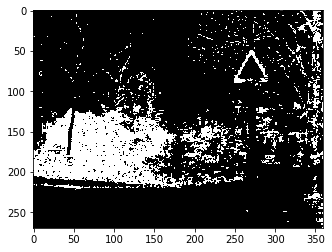

In [74]:
from skimage import filters
from skimage import color
import matplotlib.cm as cm

connectedexample = crossingfilenames[2]
simpleexample = crossingfilenames[0]
twosignsexample = crossingfilenames[3]
examplethatfailsthresholding = crossingfilenames[4]

currexample = examplethatfailsthresholding

bimg = imread("images/"+currexample)
hsvim = rgb_to_hsv(bimg)


img = hsvim[:,:,1]*255
img = filters.gaussian(img, sigma=0.4)
val = filters.threshold_otsu(img)

thresh_img = img > val+35

print("Threshold found: ", val)

imgplt=plt.imshow(thresh_img,cmap = cm.gray)

### Step 2: create region objects from the binary thresholded image

You can use label from skimage.measure to assign each connected component a unique label.
To dispay the labels using pseudocolors, use skimage.color.label2rgb

Display the label2rgb-image to check if the traffic sign regions are separated from the surroundings.

Experiment with many different input images - can you make the labelling work well for most images?

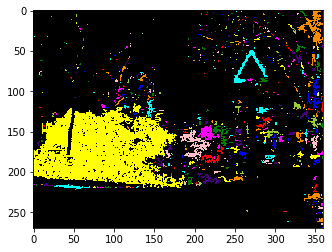

In [75]:
from skimage.color import label2rgb
from skimage.measure import label, regionprops, regionprops_table
label_img = label(thresh_img)

rgblabelim = label2rgb(label_img, bg_label=0)
plt.imshow(rgblabelim)

### Step 3: Try to filter out regions that cannot possibly be a traffic sign

Next week we will investigate shape features fully, but filtering based on region size can reduce the number of regions quite a bit.

Use regionprops from skimage.measure to create the region objects.
Try simple filtering based on size to reduce the number of candidate regions. 

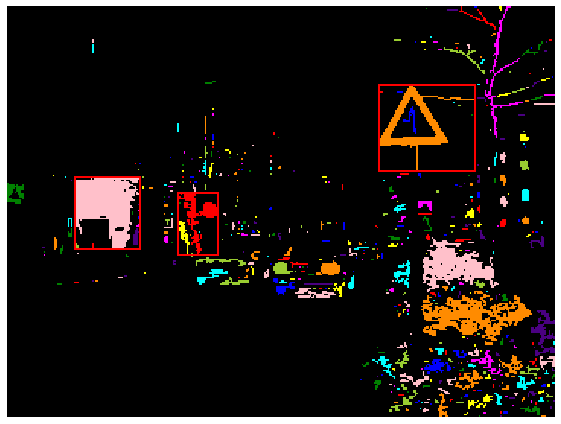

In [70]:
import matplotlib.patches as mpatches
regions = regionprops(label_img)
minarea = 200 
maxarea = 1500

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(rgblabelim)

for reg in regions:
    # take regions with large enough areas
    if reg.area >= minarea and reg.area<maxarea  and reg.major_axis_length/reg.minor_axis_length<1.7:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = reg.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

### Step 4: Improved preprocessing to clean up the thresholded image

If you thresholded image either has traffic signs fragmented, or connected to background object, binary morphological operations like opening and/or closing can help. 
Have a look at /studier/emner/matnat/ifi/INF2310/v20/undervisningsmateriale/forelesning/inf2310-2020-11-morfologi.pdf  (in Norwegian) or read the the corresponding sections from Chapter 9 in Gonzales & Woods. 

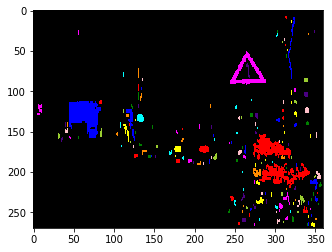

In [71]:
from skimage.morphology import binary_opening, rectangle, square
from skimage.segmentation import clear_border
bw = binary_opening(thresh_img, rectangle(1,1))
bw = binary_opening(thresh_img, rectangle(3,1))
#bw = thresh_img
# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
cleanlabels = label(cleared)
rgbcleanlab = label2rgb(cleanlabels, bg_label=0)

newregions = regionprops(cleanlabels)
plt.imshow(rgbcleanlab)



Do the sorting on area again for the new regions.

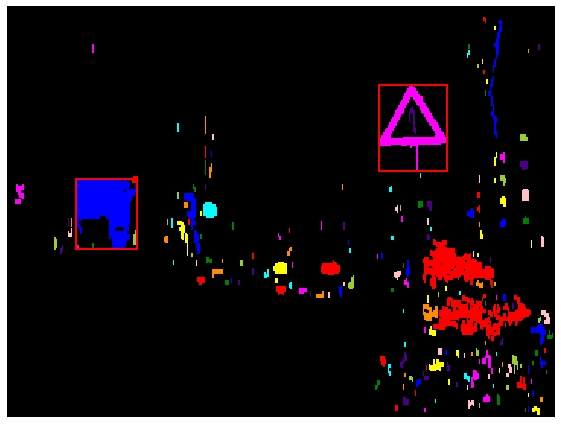

In [72]:
inarea = 200 
maxarea = 1500

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(rgbcleanlab)

for reg in newregions:
    # take regions with large enough areas
    if reg.area >= minarea and reg.area<maxarea  and reg.major_axis_length/reg.minor_axis_length<1.7:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = reg.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()